In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from metpy.plots import colortables
import matplotlib.colors as colors
# import local paths
from configpaths import dlproj_main, figsave_path

In [2]:
data = xr.open_dataset(f'{dlproj_main}/pfi_fps.nc')

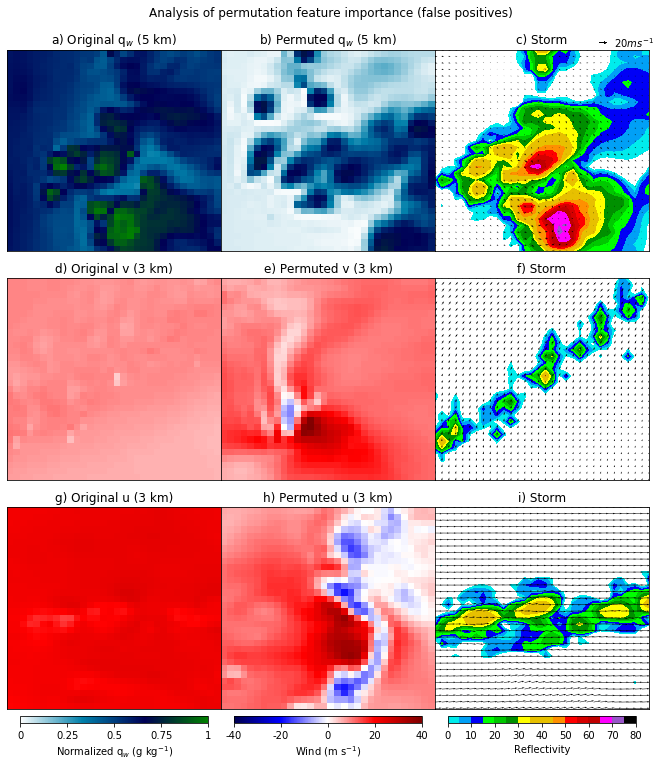

In [3]:
# %-----------------------------------------------------

levels=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
cmap = colortables.get_colortable('NWSReflectivity')

# %-----------------------------------------------------

fig = plt.figure(figsize=(9,10))

fig.suptitle('Analysis of permutation feature importance (false positives)', fontsize=12, y=1.0)

# %-----------------------------------------------------

# %------------

ax1 = fig.add_axes([0.00, 0.66, 0.33, 0.28])

ax1.set_title('a) Original q$_{w}$ (5 km)')
ax1.pcolormesh(data['original_q'].values, cmap="ocean_r", vmin=0, vmax=1.)
ax1.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)   

# %------------

ax2 = fig.add_axes([0.33, 0.66, 0.33, 0.28])

ax2.set_title('b) Permuted q$_{w}$ (5 km)')
mplot = ax2.pcolormesh(data['permuted_q'].values, cmap="ocean_r", vmin=0, vmax=1.)
ax2.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)   

# %------------

ax4 = fig.add_axes([0.66, 0.66, 0.33, 0.28])

ax4.set_title('c) Storm')
ax4.contourf(data['dbz_q'].values, cmap=cmap, levels=levels, vmin=0, vmax=80)
ax4.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax4.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)   
ax4.quiver(data['x_q'].values,data['y_q'].values, data['u_q'].values, data['v_q'].values, 
           angles='xy', scale_units='xy', scale=20)

# %-----------------------------------------------------

# %------------

ax5 = fig.add_axes([0.00, 0.3425, 0.33, 0.28])

ax5.set_title('d) Original v (3 km)')
ax5.pcolormesh(data['original_v'].values, cmap="seismic", vmin=-40, vmax=40)
ax5.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax5.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)   

# %------------

ax6 = fig.add_axes([0.33, 0.3425, 0.33, 0.28])

ax6.set_title('e) Permuted v (3 km)')
ax6.pcolormesh(data['permuted_v'].values, cmap="seismic", vmin=-40, vmax=40)
ax6.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax6.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)   

# %------------

ax8 = fig.add_axes([0.66, 0.3425, 0.33, 0.28])

ax8.set_title('f) Storm')
ax8.contourf(data['dbz_v'].values, cmap=cmap, levels=levels, vmin=0, vmax=80)
ax8.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax8.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)   
ax8.quiver(data['x_v'].values, data['y_v'].values, data['u_v'].values, data['v_v'].values, 
           angles='xy', scale_units='xy', scale=20)


# %-----------------------------------------------------

indx = 8
variable = 9

# %------------

ax9 = fig.add_axes([0.00, 0.025, 0.33, 0.28])

ax9.set_title('g) Original u (3 km)')
diffplot = ax9.pcolormesh(data['original_u'].values, cmap="seismic", vmin=-40, vmax=40)
ax9.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax9.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)   

# %------------

ax10 = fig.add_axes([0.33, 0.025, 0.33, 0.28])

ax10.set_title('h) Permuted u (3 km)')
ax10.pcolormesh(data['permuted_u'].values, cmap="seismic", vmin=-40, vmax=40)
ax10.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax10.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)   

# %------------

ax12 = fig.add_axes([0.66, 0.025, 0.33, 0.28])

ax12.set_title('i) Storm')
dbzplot = ax12.contourf(data['dbz_u'].values, cmap=cmap, levels=levels, vmin=0, vmax=80)
Q = ax12.quiver(data['x_u'].values,data['y_u'].values, data['u_u'].values, data['v_u'].values, 
                angles='xy', scale_units='xy', scale=20)
qk = ax12.quiverkey(Q, 0.925, 0.95, 20, r'$20 m s^{-1}$', labelpos='E',
                    coordinates='figure')
ax12.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax12.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)   

# %-----------------------------------------------------


cbar_ax = fig.add_axes([0.02, 0.005, 0.29, 0.01])
cbar = fig.colorbar(mplot, ticks=[0,0.25,0.50,0.75,1.0], 
                    cax=cbar_ax, orientation="horizontal")
cbar.ax.set_xticklabels([0,0.25,0.50,0.75,1])
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Normalized q$_{w}$ (g kg$^{-1}$)', fontsize=10)

cbar_ax = fig.add_axes([0.35, 0.005, 0.29, 0.01])
cbar = fig.colorbar(diffplot, ticks=[-40,-20,0,20,40], 
                    cax=cbar_ax, orientation="horizontal")
cbar.ax.set_xticklabels([-40,-20,0,20,40])
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Wind (m s$^{-1}$)', fontsize=10)

cbar_ax = fig.add_axes([0.68, 0.005, 0.29, 0.01])
cbar = fig.colorbar(dbzplot, ticks=[0,10,20,30,40,50,60,70,80], 
                    cax=cbar_ax, orientation="horizontal", extend='max')
cbar.ax.set_xticklabels([0,10,20,30,40,50,60,70,80])
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Reflectivity', fontsize=10)

plt.savefig(f"{figsave_path}/journal_fig8.png", bbox_inches='tight', dpi=500, transparent=True)
plt.show()

# %-----------------------------------------------------